# Feedforward neural network
<img src="http://ufldl.stanford.edu/tutorial/images/Network331.png">
## Calculated on an individual users file
### Changing the value in pd.read_csv changes the user that the model trains on
### This model uses a feedforward neural network on the master.csv file which is a file that has summed up all the data from the 51 users. 
### The data is randomized and 50% of the dataset is user for training and 50% for testing
### X = input from the 52 broadmann areas at each timestep
### Y = REST or ADDITION from the Mark column of the dataset
### The model tries learns and tries to predict if each timeserie of data from the 52 broadmann areas is REST (Default mode network) or Addition (Task positive network)

In [1]:
# Importing datasets
import pandas as pd

master = pd.read_csv("../IDOXY_full/master.csv")
idoxy_one_thirtyfive = pd.read_csv("../IDOXY_full/ID-OXY-1-35.csv")
idoxy_thirtysix_fiftyone = pd.read_csv("../IDOXY_full/ID-OXY-36-51.csv")

/Users/birgermoell/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (56,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/birgermoell/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Train on 656 samples, validate on 656 samples
Epoch 1/50
656/656 [==============================] - 0s - loss: 0.2482 - acc: 0.5229 - val_loss: 0.2493 - val_acc: 0.4787
Epoch 2/50
656/656 [==============================] - 0s - loss: 0.2390 - acc: 0.5823 - val_loss: 0.2463 - val_acc: 0.7622
Epoch 3/50
656/656 [==============================] - 0s - loss: 0.2184 - acc: 0.6966 - val_loss: 0.2366 - val_acc: 0.6936
Epoch 4/50
656/656 [==============================] - 0s - loss: 0.1776 - acc: 0.7622 - val_loss: 0.2058 - val_acc: 0.8491
Epoch 5/50
656/656 [=================

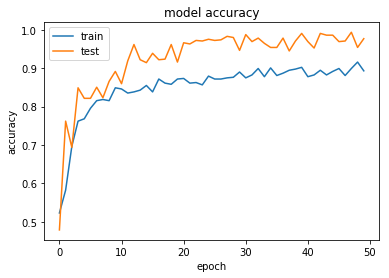

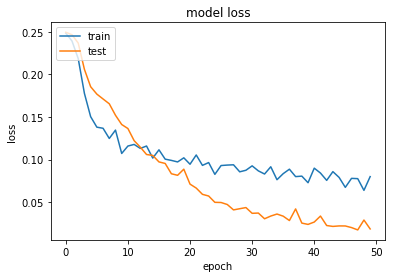

In [18]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy
import keras

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

dataset = pd.read_csv("../IDOXY_full/ID-OXY-22.csv")

# running on floydhub
# dataset = pd.read_csv("https://www.floydhub.com/viewer/data/res7UHjG5WSPgPStBT84xW/ID-OXY-20.csv")
# split into input (X) and output 󰀀 variables

# Remove missing values
dataset = dataset.dropna()

# make a label dataset
dataset["Label"] = dataset["Mark"]

# change rest values to 
dataset["Mark"][dataset["Mark"] == "REST"] = 0
dataset["Mark"][dataset["Mark"] == "ADDITION"] = 1
dataset["Mark"][dataset["Mark"] == "PASSTHOUGHT"] = 2
dataset["Mark"][dataset["Mark"] == "JUNK"] = 3

# remove the JUNK data
dataset = dataset[dataset.Mark != 2]
dataset = dataset[dataset.Mark != 3]

# shuffle the data
dataset = dataset.sample(frac=1)

X = np.array(dataset.ix[:, :'CH52'])
Y = np.array([[1,0] if i == 0 else [0,1] for i in dataset.Mark])

# Dropout - the number of neurons removed at each layers, who are readded when testing
# Batch size - the number of data points added at each time, affects training time
# Epochs - the number of training/test sessions

# create model
model = Sequential()
model.add(BatchNormalization(input_shape=(52,)))
model.add(Dropout(0.3))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, init="normal", activation='relu'))

#model.add(Dense(100, init="normal", activation='relu'))
#model.add(Dense(100, init="normal", activation='relu'))

#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))

model.add(Dense(2, init="normal", activation='softmax'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.5, nb_epoch=50, batch_size=50, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Feedforward neural network
<img src="http://ufldl.stanford.edu/tutorial/images/Network331.png">
## Calculated on the master.csv file
## This model is computationaly intensive to train and it might freeze your system if you try training it on your local computer. 
## For training you can host a interactive jupyter notebook on floydhub.com but I'm currently having some issues with their server timing out. 
### This model uses a feedforward neural network on the master.csv file which is a file that has summed up all the data from the 51 users. 
### The data is randomized and 50% of the dataset is user for training and 50% for testing
### X = input from the 52 broadmann areas at each timestep
### Y = REST or ADDITION from the Mark column of the dataset
### The model tries learns and tries to predict if each timeserie of data from the 52 broadmann areas is REST (Default mode network) or Addition (Task positive network)

Train on 32608 samples, validate on 32608 samples
Epoch 1/400
32608/32608 [==============================] - 1s - loss: 0.2459 - acc: 0.5392 - val_loss: 0.2426 - val_acc: 0.5661

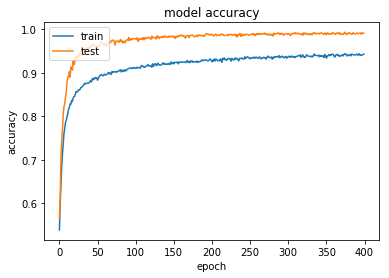

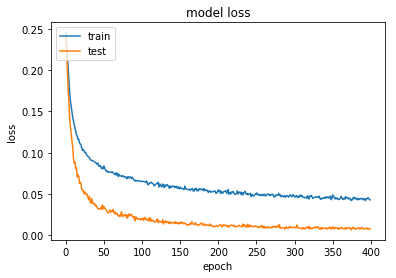

In [21]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy
import keras

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

dataset = pd.read_csv("../IDOXY_full/master.csv")

# running on floydhub
# dataset = pd.read_csv("https://www.floydhub.com/viewer/data/res7UHjG5WSPgPStBT84xW/master.csv")

# split into input (X) and output 󰀀 variables

# Remove missing values
dataset = dataset.dropna()

# make a label dataset
dataset["Label"] = dataset["Mark"]

# change rest values to 
dataset["Mark"][dataset["Mark"] == "REST"] = 0
dataset["Mark"][dataset["Mark"] == "ADDITION"] = 1
dataset["Mark"][dataset["Mark"] == "PASSTHOUGHT"] = 2
dataset["Mark"][dataset["Mark"] == "JUNK"] = 3

# remove the JUNK data
dataset = dataset[dataset.Mark != 2]
dataset = dataset[dataset.Mark != 3]


# shuffle the data
dataset = dataset.sample(frac=1)

X = np.array(dataset.ix[:, :'CH52'])
Y = np.array([[1,0] if i == 0 else [0,1] for i in dataset.Mark])

# Dropout - the number of neurons removed at each layers, who are readded when testing
# Batch size - the number of data points added at each time, affects training time
# Epochs - the number of training/test sessions

# create model
model = Sequential()
model.add(BatchNormalization(input_shape=(52,)))
model.add(Dropout(0.1))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dense(100, init="normal", activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))

model.add(Dense(2, init="normal", activation='softmax'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.5, nb_epoch=400, batch_size=250, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Save the weight and biases to JSON for use in FNIR filter

In [2]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


# adding x and y
dataset = pd.read_csv("../IDOXY_full/ID-OXY-10.csv")

# Remove missing values
dataset = dataset.dropna()

# make a label dataset
dataset["Label"] = dataset["Mark"]

# change rest values to 
dataset["Mark"][dataset["Mark"] == "REST"] = 0
dataset["Mark"][dataset["Mark"] == "ADDITION"] = 1
dataset["Mark"][dataset["Mark"] == "PASSTHOUGHT"] = 2
dataset["Mark"][dataset["Mark"] == "JUNK"] = 3

# remove the JUNK data
dataset = dataset[dataset.Mark != 2]
dataset = dataset[dataset.Mark != 3]

# shuffle the data
dataset = dataset.sample(frac=1)

X = np.array(dataset.ix[:, :'CH52'])
Y = np.array([[1,0] if i == 0 else [0,1] for i in dataset.Mark])


# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
acc: 54.95%


# LSTM model
<img src="http://deeplearning.net/tutorial/_images/lstm_memorycell.png">
## Long short term memory
### Long short term memory is a model that keeps a memory of the last timestep and keeps it for concurrent timesteps.
### LSTM is likely the best technique to use in a real time system since it is made for predicting time serie.
### When you are using LSTM you need to reshape the data so the batch size becomes a dimension of the data. 


In [3]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy
import keras

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

dataset = pd.read_csv("../IDOXY_full/ID-OXY-20.csv")
# running on floydhub
# dataset = pd.read_csv("https://www.floydhub.com/viewer/data/res7UHjG5WSPgPStBT84xW/ID-OXY-20.csv")
# split into input (X) and output 󰀀 variables

# Remove missing values
dataset = dataset.dropna()

# make a label dataset
dataset["Label"] = dataset["Mark"]

# change rest values to 
dataset["Mark"][dataset["Mark"] == "REST"] = 0
dataset["Mark"][dataset["Mark"] == "ADDITION"] = 1
dataset["Mark"][dataset["Mark"] == "PASSTHOUGHT"] = 2
dataset["Mark"][dataset["Mark"] == "JUNK"] = 3

# remove the JUNK data
dataset = dataset[dataset.Mark != 2]
dataset = dataset[dataset.Mark != 3]

# shuffle the data
dataset = dataset.sample(frac=1)

X = np.array(dataset.ix[:, :'CH52'])
Y = np.array([[1,0] if i == 0 else [0,1] for i in dataset.Mark])

# Dropout - the number of neurons removed at each layers, who are readded when testing
# Batch size - the number of data points added at each time, affects training time
# Epochs - the number of training/test sessions

# create model
# LSTM model



model = Sequential()
model.add(BatchNormalization(input_shape=(52,)))
model.add(Dropout(0.1))
model.add(LSTM(100, init="normal", activation='relu'))
model.add(LSTM(100, init="normal", activation='relu'))
model.add(LSTM(100, init="normal", activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(100, kernel_initializer='uniform', activation='relu'))

model.add(Dense(2, init="normal", activation='softmax'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.5, nb_epoch=400, batch_size=25, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


ValueError: Input 0 is incompatible with layer lstm_2: expected ndim=3, found ndim=2